In [43]:
# import thư viện
import pandas as pd #Đọc dữ liệu
import numpy as np #Xử lý dữ liệu
import matplotlib.pyplot as plt #Vẽ biểu đồ
%matplotlib inline
import pmdarima as pm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [44]:
# Load dataset
data = pd.read_csv("VCB Historical Data final.csv")
data

,Date,Price,Open,High,Low,Vol.,Change %
0,12/01/2017,36620.0,36847.0,37075.0,36392.0,2.66M,-0.41%
1,12/04/2017,37454.0,36772.0,37454.0,36620.0,2.48M,2.28%
2,12/05/2017,36468.0,37151.0,37909.0,36468.0,2.52M,-2.63%
3,12/06/2017,36392.0,36392.0,36620.0,35710.0,2.68M,-0.21%
4,12/07/2017,36089.0,36392.0,36392.0,35407.0,3.49M,-0.83%
...,...,...,...,...,...,...,...
1371,06/05/2023,98000.0,95200.0,98700.0,95200.0,1.30M,3.27%
1372,06/06/2023,99000.0,98000.0,99000.0,96500.0,759.50K,1.02%
1373,06/07/2023,97000.0,99000.0,99000.0,97000.0,749.60K,-2.02%
1374,06/08/2023,100000.0,97000.0,101700.0,97000.0,1.34M,3.09%


In [45]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376 entries, 0 to 1375
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1376 non-null   object 
 1   Price     1376 non-null   float64
 2   Open      1376 non-null   float64
 3   High      1376 non-null   float64
 4   Low       1376 non-null   float64
 5   Vol.      1376 non-null   object 
 6   Change %  1376 non-null   object 
dtypes: float64(4), object(3)
memory usage: 75.4+ KB


,Price,Open,High,Low
count,1376.000000,1376.000000,1376.000000,1376.000000
mean,66180.946948,66123.944041,66962.237645,65310.408430
std,15338.628380,15340.420842,15481.638346,15160.994459
min,33360.000000,33360.000000,34194.000000,31540.000000
25%,51989.000000,51912.000000,52583.750000,51362.750000
50%,67715.500000,67578.000000,68153.500000,66810.000000
75%,77400.000000,77342.000000,78585.000000,76400.000000
max,100500.000000,100000.000000,102000.000000,99000.000000


In [46]:
#Định dạng lại cột Date từ obj -> datatime
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace = True)
data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2017-12-01,36620.0,36847.0,37075.0,36392.0,2.66M,-0.41%
2017-12-04,37454.0,36772.0,37454.0,36620.0,2.48M,2.28%
2017-12-05,36468.0,37151.0,37909.0,36468.0,2.52M,-2.63%
2017-12-06,36392.0,36392.0,36620.0,35710.0,2.68M,-0.21%
2017-12-07,36089.0,36392.0,36392.0,35407.0,3.49M,-0.83%
...,...,...,...,...,...,...
2023-06-05,98000.0,95200.0,98700.0,95200.0,1.30M,3.27%
2023-06-06,99000.0,98000.0,99000.0,96500.0,759.50K,1.02%
2023-06-07,97000.0,99000.0,99000.0,97000.0,749.60K,-2.02%


In [54]:
# Chọn thuộc tính
data = data.loc[:, ['Price']]
data

,Price
Date,
2017-12-01,36620.0
2017-12-04,37454.0
2017-12-05,36468.0
2017-12-06,36392.0
2017-12-07,36089.0
...,...
2023-06-05,98000.0
2023-06-06,99000.0
2023-06-07,97000.0


<Axes: xlabel='Date'>

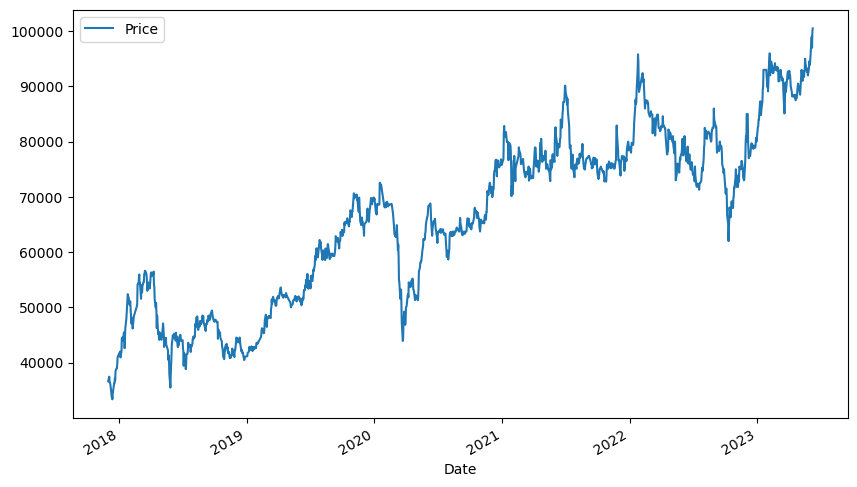

In [55]:
data.plot(figsize=(10,6))

In [56]:
# Kiểm tra tính dừng
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.Price, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -1.2697632137004418
2. P-Value :  0.6428896870555307
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1375
5. Critical Values :
	 1% :  -3.4351147636466535
	 5% :  -2.863644291237025
	 10% :  -2.5678903221157023


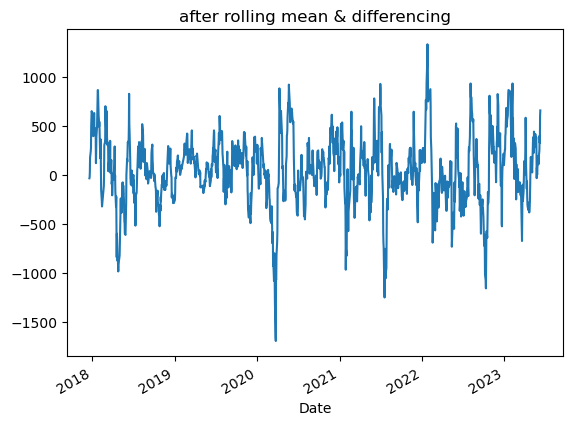

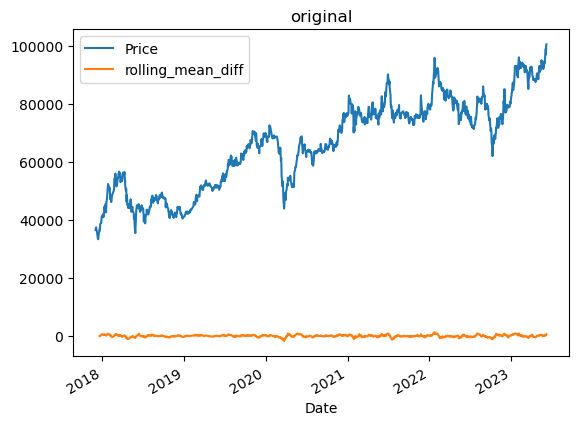

In [57]:
# Tính giá trị trung bình trượt
rolling_mean = data.rolling(window = 12).mean()
data['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
data['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
data.plot(title='original');

In [8]:
# Kiểm tra tính dừng
dftest = adfuller(data['rolling_mean_diff'].dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
  print("\t",key, ": ", val)

1. ADF :  -5.905307500800817
2. P-Value :  2.717439444757122e-07
3. Num Of Lags :  24
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1339
5. Critical Values :
	 1% :  -3.435243114656267
	 5% :  -2.8637009293454163
	 10% :  -2.567920483819421


In [22]:
# Chia tập dữ liệu thành train, test, validate (65-25-10)
# Tính số lượng mẫu tương ứng với từng tập
train_size = int(0.65 * len(data))
test_size = int(0.25 * len(data))
val_size = len(data) - train_size - test_size

# Chia dữ liệu thành các tập
train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
validate_data = data[train_size+test_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))
print("Validate data size:", len(validate_data))

Train data size: 894
Test data size: 344
Validate data size: 138


In [23]:
import statsmodels.api as sm
# Xác định các giá trị tốt nhất cho các tham số khởi tạo
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data['Price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# In thông tin về mô hình
model_fit.summary()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                  894
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -7531.022
Date:                            Sat, 17 Jun 2023   AIC                          15072.044
Time:                                    01:30:42   BIC                          15095.949
Sample:                                         0   HQIC                         15081.185
                                            - 894                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9986      0.240      4.157      0.000       0.528       1.469
ma.L1         -0.9986      0.245     -4.076      0.000      -1.479      -0.518
ar.S.L12       0.1573      0.015     10.478      0.000       0.128       0.187
ma.S.L12      -0.9996      0.033    -30.190      0.000      -1.064      -0.935
sigma2      1.398e+06   8.25e-08   1.69e+13      0.000     1.4e+06     1.4e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               437.96
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.48
Prob(H) (two-sided):                  0.61   Kurtosis:                         6.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.41e+29. Standard errors may be unstable.
"""

In [12]:
# Qá trình Testing
x_test = np.array(test_data.index)
y_test = np.array(test_data['Price'])

y_pred = model_fit.predict(start=0, end=len(y_test)-1)

# Tính toán các độ đo cho quá trình test
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))

# In kết quả
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape_test )

MAE: 32115.797297960344
MSE: 1109013235.1376152
RMSE: 33301.85032603467
MAPE: 40.72665905535278


In [24]:
#Quá trình Validate
x_validate = np.array(validate_data.index)
y_validate = np.array(validate_data['Price'])

y_pred_val = model_fit.predict(start=0, end=len(y_validate)-1)

# Tính toán các độ đo cho quá trình validate
mape_validate = np.mean(np.abs((y_validate - y_pred_val) / y_validate)) * 100
mse = mean_squared_error(y_validate, y_pred_val)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_validate - y_pred_val))

# In kết quả
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:",mape_validate)

MAE: 41763.74291024531
MSE: 1791422982.9467611
RMSE: 42325.20505498775
MAPE: 47.39699381492034


In [25]:
#Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_validate)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

# Tính toán MAPE 
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mape_validate = np.mean(np.abs((y_validate - y_pred_val) / y_validate)) * 100
print("Testing MAPE:", mape_test )
print("Validation MAPE:",mape_validate)

#Tính toán MAE
mae_test = np.mean(np.abs(y_test - y_pred))
mae_val = np.mean(np.abs(y_validate - y_pred_val))

print("Testing MAE:", mae_test)
print("Validation MAE:", mae_val)

Testing RMSE: 33301.85032603467
Validation RMSE: 42325.20505498775
Testing MAPE: 40.72665905535278
Validation MAPE: 47.39699381492034
Testing MAE: 32115.797297960344
Validation MAE: 41763.74291024531


In [26]:
# Lấy ngày cuối cùng trong dữ liệu
last_date = data.index[-1]

# Dự đoán 30 ngày tiếp theo từ ngày cuối cùng
forecast = model_fit.get_forecast(steps=30)

# Lấy các giá trị dự đoán
forecast_values = forecast.predicted_mean

# Tạo danh sách các ngày trong 30 ngày tiếp theo
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=30)
forecast_dates

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


DatetimeIndex(['2023-06-10', '2023-06-11', '2023-06-12', '2023-06-13',
               '2023-06-14', '2023-06-15', '2023-06-16', '2023-06-17',
               '2023-06-18', '2023-06-19', '2023-06-20', '2023-06-21',
               '2023-06-22', '2023-06-23', '2023-06-24', '2023-06-25',
               '2023-06-26', '2023-06-27', '2023-06-28', '2023-06-29',
               '2023-06-30', '2023-07-01', '2023-07-02', '2023-07-03',
               '2023-07-04', '2023-07-05', '2023-07-06', '2023-07-07',
               '2023-07-08', '2023-07-09'],
              dtype='datetime64[ns]', freq='D')

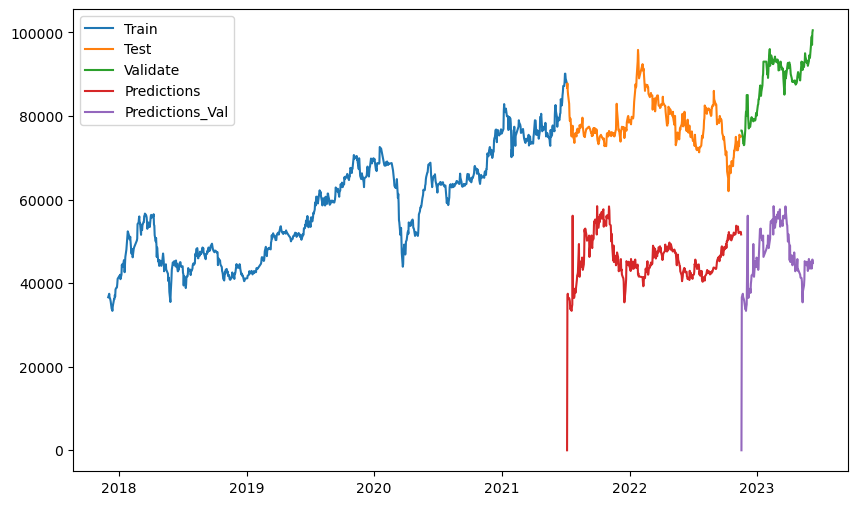

In [28]:
# Vẽ biểu đồ 
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(validate_data.index, validate_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(validate_data.index, y_pred_val)
plt.legend(['Train', 'Test','Validate','Predictions','Predictions_Val'])
plt.show()

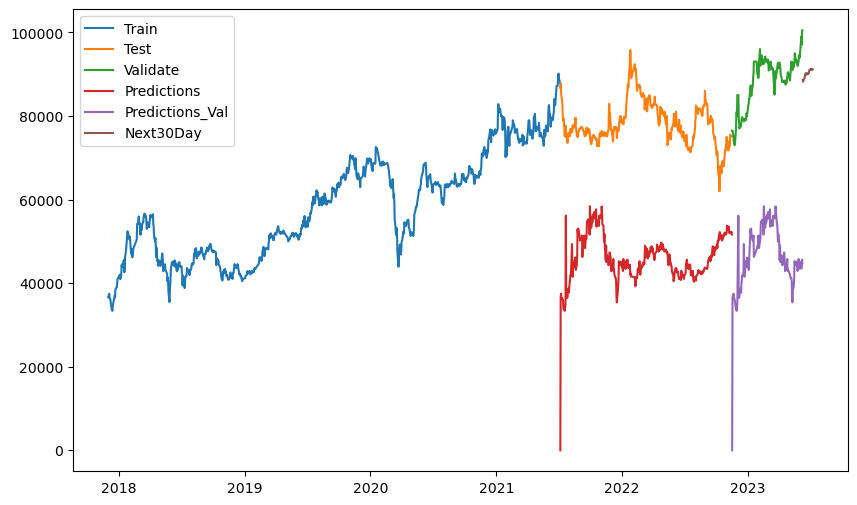

In [29]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(validate_data.index, validate_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(validate_data.index, y_pred_val)
plt.plot(forecast_dates, forecast_values)  
plt.legend(['Train', 'Test','Validate','Predictions','Predictions_Val','Next30Day'])
plt.show()

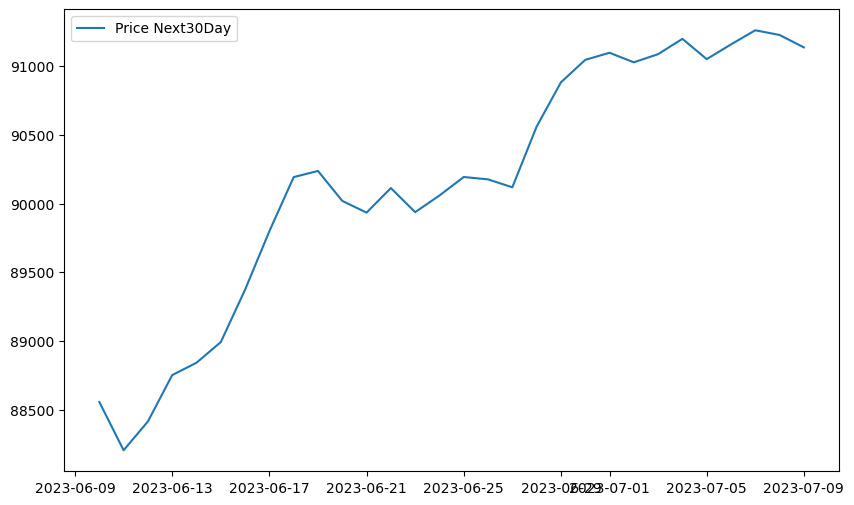

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(forecast_dates, forecast_values)  
plt.legend(['Price Next30Day'])
plt.show()